# Capstone Project

## Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a># Introduction/Business Problem

As everyone knows, today the world is going through a hard situation. The virus, COVID-19 has changed everyone's lives in different ways. That is why I chose this subject because I am interested to go through some data by myself and see what is happening around the world. However, to give the project an appropriate definition I will go for:

**Colombia** is one of the last countries to get the virus, **the president is interested to know how the virus has been affecting the most important and the most affected countries to understand how the virus has grown there.** As **Korea** had shown a big number of confirmed cases, and they also have been showing a decreasing number of cases in the last days, the president will take this Country **as an example**. So, he would like to understand what they have been doing so, he can establish some of their strategies in Colombia to avoid the massive increase of people sick by COVID 19. This is important because Colombia does not have a strong medical service, so to avoid the major number of infections is a priority.

On the other hand, we will use the **opposite example of Korea: USA**. This country has shown an increasing number of confirmed cases. So it will be interesting to **compare the strategies of each country to give a complete idea to the president of what is the best decision to take given the situation.**

# Data <a name="data"></a>

For this project, I will be using the **data provided by HDX(The humanitarian data exchange)**. I will be using data of the confirmed cases of COVID-19 around the world up to the actual date. As the first step, I will take the data of Korea, Colombia, and USA to analyze the behavior of the virus in each country. As it is well known, quarantine has been the solution that has been showing the best results. However, there are different strategies around the world to close differents social places. Here I will be using **Foursquare to compare the most visited places in Korea, Colombia, and USA to see how the countries are similar and if the strategies that Korea had applied can be applied in Colombia. On the other hand, it might be also interesting to see how USA has been managing their most popular places and contrast it with Korea so we can see if there is a possible social area that has not been closed and it could be a redpoint of infections.** 

Clustering the favorites places of each country we can see if there is a possibility to apply the strategy applied for Korea and to see if there is someplace in common that Korea has closed and might not be close by USA and it could show us the focus of a possible point contagion. So the president will see the necessity to close it so Colombia can go closer to the Korea results and avoid the increment numbers of cases.

### Data description

#### Data provided by HDX
* Data show the record of confirmed cases of COVID-19 around the world, we will use data from Korea,USA and Colombia.
* Data is conformed by: State, Country, Latitude, Longitude, time series of the cases up today.

We will use this data to compare how the virus had affected the countries selected.

#### Data provided by Foursqueare
* Favorites places on different neighborhoods of each Country.

Then wi will use this info to cluster the data and see if there is some similirities between countries so we can applied the strategy applyed by Korea.

### Neighborhood Candidates

To give a concrete context to the project, we will use the neighborhoods of the most important cities of Korea,Usa and Colombia.
The cities will be:
* **Korea:** Seoul,Busan,Incheon,Daegu
* **USA:** New York, Los Angeles, Chicago, Houston
* **Colombia:** Bogotá, Medellín, Cali, Barranquilla

## Colombia, Korea and USA Data

In [8]:
#Libraries needed
import pandas as pd
import numpy as np

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

import json 

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

import requests 
from pandas.io.json import json_normalize 

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium 

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1

In [77]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_3b47b676deb14458a1114f93647745a1 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='6nzu1r6JWrhMWx7CJTuwKyrrBO3tYLA8gKxqvgeawcx9',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_3b47b676deb14458a1114f93647745a1.get_object(Bucket='capstoneproject-donotdelete-pr-8oyjruyqvwo8qb',Key='confirmed_cases (1).csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
df_data_0.head()


,Province/State,Country/Region,Lat,Long,1,2,3,4,5,6,...,78,79,80,81,82,83,84,85,86,87
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,444,484,521,555,607,665,714,784,840,906
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,400,409,416,433,446,467,475,494,518,539
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,564,583,601,601,638,646,659,673,673,696
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,19


In [93]:
#Data of the countries we are looking for
co_us = ['Colombia', 'US']
co_ko = ['Colombia','Korea, South']
countries = ['Colombia','US','Korea, South']
#DF with 3 countries
data_df = df_data_0.loc[df_data_0['Country/Region'].isin(countries)]
data_df.drop("Province/State",axis=1,inplace = True)
#data_df.head()
#DF with Colombia and Korea cases
data_ko = df_data_0.loc[df_data_0['Country/Region'].isin(co_ko)]
data_ko.drop("Province/State",axis=1,inplace = True)
#DF with Colmbia and US cases
data_us = df_data_0.loc[df_data_0['Country/Region'].isin(co_us)]
data_us.drop("Province/State",axis=1,inplace = True)
data_us.head()

,Country/Region,Lat,Long,1,2,3,4,5,6,7,...,78,79,80,81,82,83,84,85,86,87
82,Colombia,4.5709,-74.2973,0,0,0,0,0,0,0,...,2054,2223,2473,2709,2776,2852,2979,3105,3233,3439
225,US,37.0902,-95.7129,1,1,2,2,5,5,5,...,429052,462780,496535,526396,555313,580619,607670,636350,667801,699706


In [98]:
#Table to compare Korea and Colombia
cases_ko = data_ko.copy()
cases_ko.drop("Lat",axis=1,inplace=True)
cases_ko.drop("Long",axis=1,inplace=True)

#Making a list of days to transpose the df
days = []
for day in range(1,88):
    days.append(str(day))

#cases_df.head()
#Transpose DataFrame for Korea and Colombia table
cases_ko =  cases_ko[days].transpose()
cases_ko.columns = ['Colombia','Korea']

#Table to compare US and Colombia
cases_us = data_us.copy()
cases_us.drop("Lat",axis=1,inplace=True)
cases_us.drop("Long",axis=1,inplace=True)
#Transpose DataFrame for US and Colombia table
cases_us =  cases_us[days].transpose()
cases_us.columns = ['Colombia','US']


In [72]:
data_df["Total cases"] = data_df.sum(axis=1)
final_df = data_df[["Country/Region","Lat","Long","Total cases"]].copy()
final_df

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Country/Region,Lat,Long,Total cases
82,Colombia,4.5709,-74.2973,8.729655e+04
143,"Korea, South",36.0000,128.0000,8.667360e+05
225,US,37.0902,-95.7129,1.778466e+07


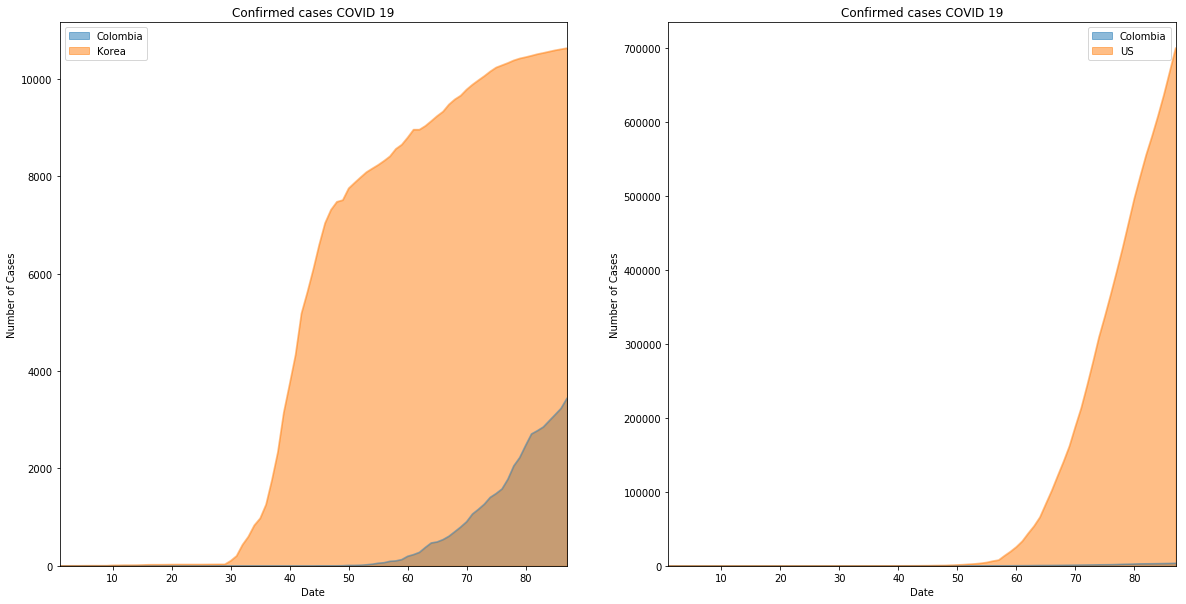

In [103]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

cases_ko.index = cases_ko.index.map(int)
cases_ko.plot(kind='area', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             ax=ax0)
ax0.set_title('Confirmed cases COVID 19')
ax0.set_ylabel('Number of Cases')
ax0.set_xlabel('Date')

cases_us.index = cases_us.index.map(int)
cases_us.plot(kind='area', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             ax=ax1)
ax1.set_title('Confirmed cases COVID 19')
ax1.set_ylabel('Number of Cases')
ax1.set_xlabel('Date')

plt.show()

## First Statement
With the graphs is possible to see what was established at the beginning.
1. Korea is a country that is showing and improvement by having a decrease in the number of confirmed cases.
2. US is an opposite example of Korea. They have been showing an increasing number of confirmed cases.

Now, once we have a good example of how to go against the Virus and an opposite example of it, we can study how similar the countries are so we can apply or not their strategies.

In [106]:
final_df.reset_index()

,index,Country/Region,Lat,Long,Total cases
0,82,Colombia,4.5709,-74.2973,8.729655e+04
1,143,"Korea, South",36.0000,128.0000,8.667360e+05
2,225,US,37.0902,-95.7129,1.778466e+07


## Methodology <a name="methodology"></a>

To give a good approach to the president of how he must do to avoid the major number of confirmed cases we will use the two examples of countries that have been trough the virus in a way that presents good results and another that has not shown good results. 

Every country takes differents decisions on how to avoid crowds. Having the most important places, they decided to close or no (if the place gives an indispensable service (eg.markets)). So what we have to do in the first place is to see how similar our countries are. If they have in common a place which is often visited by too many people, and in the case of Korea we found that they close it, we must advise the president to close it. On the other hand, if we see that US has a commonplace with Colombia, and their decision was not to close it and we consider it a possible place to generate crows, taking the bad results of US, we must also decide to close that place.

### 1. Dataframe with the info of the most important cities of each country

In [36]:
import pandas as pd
c_columns = ['Country','City','Lat','Long']
Country = ["Colombia","Colombia","Colombia","Colombia","Korea","Korea","Korea","Korea","USA","USA","USA","USA"]
City = ["Bogotá","Medellin","Cali","Barranquilla","Seoul","Busan","Incheon","Daegu","New York","Los Angeles","Chicago","Houston"]
Neighborhood = []
Lat = [4.60971,6.25184,3.4372201,10.9878,37.5326,35.1027794,37.456459,35.8702812,40.7142715,34.0522308,42.5833300,29.7632809]
Long = [-74.08175,-75.56359,-76.5224991,-74.7889,127.024612,129.0402832,126.7051468,128.5911102,-74.0059662,-118.2436829,-85.50333,-95.3632736]
cities = pd.DataFrame(Country)

cities.insert(loc=1, column='City', value=City)
cities.insert(loc=2, column='Lat', value=Lat)
cities.insert(loc=3, column='Long', value=Long)

cities.columns = c_columns
cities

,Country,City,Lat,Long
0,Colombia,Bogotá,4.609710,-74.081750
1,Colombia,Medellin,6.251840,-75.563590
2,Colombia,Cali,3.437220,-76.522499
3,Colombia,Barranquilla,10.987800,-74.788900
4,Korea,Seoul,37.532600,127.024612
5,Korea,Busan,35.102779,129.040283
6,Korea,Incheon,37.456459,126.705147
7,Korea,Daegu,35.870281,128.591110
8,USA,New York,40.714272,-74.005966
9,USA,Los Angeles,34.052231,-118.243683


### 2. Ask Foursquare for the most important venues in the principal cities of the countries the study is based

In [37]:
#Foursquare
CLIENT_ID = 'URFNEJQ54VGNGRO4IEOIULYENJOD3TXFVZXLTVBBCIYWW2JC' # your Foursquare ID
CLIENT_SECRET = 'UIIIP42MKKX4L5GIXFJZXA2ELVJJRFLEA1BIDGEZD2KVIZUS' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

#Top 20 venues that are within a radius of 500 meters

LIMIT = 20
radius = 500

venues = []

for lat, lng, city in zip(cities['Lat'], cities['Long'], cities['City']):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        lat, 
        lng, 
        radius, 
        LIMIT)

    results= requests.get(url).json()['response']['groups'][0]['items']
    
    for venue in results:
        venues.append({'City':city,'Name':venue['venue']['name'],'Category':venue['venue']['categories'][0]['name'],'Latitude':venue['venue']['location']['lat'],'Longitude':venue['venue']['location']['lng']})
       

In [39]:
venues_df = pd.DataFrame(venues)
venues_df.head()

,Category,City,Latitude,Longitude,Name
0,Coffee Shop,Bogotá,4.610935,-74.082101,Juan Valdez Café
1,Train Station,Bogotá,4.606936,-74.083254,Estación de La Sabana
2,Shopping Mall,Bogotá,4.607150,-74.085048,Centro Comercial Sabana Plaza
3,Motorcycle Shop,Bogotá,4.607081,-74.078694,Zona Motos
4,Italian Restaurant,Medellin,6.250581,-75.562280,Palazzetto D' Italia


In [40]:
venues_df.groupby('City').count()


,Category,Latitude,Longitude,Name
City,,,,
Barranquilla,20,20,20,20
Bogotá,4,4,4,4
Busan,9,9,9,9
Cali,5,5,5,5
Chicago,2,2,2,2
Daegu,20,20,20,20
Houston,20,20,20,20
Incheon,4,4,4,4
Los Angeles,20,20,20,20


In [41]:
#Unique Categories
print('There are {} uniques categories.'.format(len(venues_df['Category'].unique())))

There are 87 uniques categories.


### 3. Analize by city

In [42]:
city_study = pd.get_dummies(venues_df[['Category']], prefix="", prefix_sep="")

city_study['City'] = venues_df['City']

fixed_columns = [city_study.columns[-1]] + list(city_study.columns[:-1])
city_study = city_study[fixed_columns]

city_study.head()

,City,American Restaurant,Antique Shop,Art Gallery,BBQ Joint,Bakery,Bar,Beer Store,Boat or Ferry,Bookstore,...,Sushi Restaurant,Taco Place,Theater,Train Station,Udon Restaurant,Used Bookstore,Vacation Rental,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Bogotá,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bogotá,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Bogotá,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bogotá,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Medellin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Analize Borough by taking the mean of the frequency of occurrence of each category

In [43]:
city_grouped = city_study.groupby('City').mean().reset_index()
city_grouped

,City,American Restaurant,Antique Shop,Art Gallery,BBQ Joint,Bakery,Bar,Beer Store,Boat or Ferry,Bookstore,...,Sushi Restaurant,Taco Place,Theater,Train Station,Udon Restaurant,Used Bookstore,Vacation Rental,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Barranquilla,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000000,0.0,0.00
1,Bogotá,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,...,0.00,0.00,0.00,0.25,0.00,0.00,0.0,0.000000,0.0,0.00
2,Busan,0.00,0.00,0.00,0.00,0.333333,0.00,0.00,0.111111,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000000,0.0,0.00
3,Cali,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000000,0.0,0.00
4,Chicago,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.5,0.000000,0.0,0.00
5,Daegu,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.05,...,0.00,0.00,0.00,0.00,0.00,0.05,0.0,0.000000,0.0,0.00
6,Houston,0.00,0.00,0.00,0.00,0.000000,0.10,0.05,0.000000,0.00,...,0.00,0.00,0.10,0.00,0.00,0.00,0.0,0.000000,0.1,0.00
7,Incheon,0.00,0.00,0.00,0.00,0.250000,0.00,0.00,0.000000,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000000,0.0,0.00
8,Los Angeles,0.05,0.00,0.05,0.00,0.050000,0.05,0.00,0.000000,0.05,...,0.00,0.00,0.05,0.00,0.05,0.00,0.0,0.000000,0.0,0.00
9,Medellin,0.00,0.00,0.00,0.05,0.000000,0.10,0.00,0.000000,0.00,...,0.00,0.00,0.05,0.00,0.00,0.00,0.0,0.000000,0.0,0.00


Look for the top 5 most common venues at each City

In [44]:
num_top_venues = 5

for hood in city_grouped['City']:
    print("----"+hood+"----")
    temp = city_grouped[city_grouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barranquilla----
                  venue  freq
0           Pizza Place  0.10
1  Fast Food Restaurant  0.10
2                  Café  0.05
3                 Plaza  0.05
4            Restaurant  0.05


----Bogotá----
                 venue  freq
0          Coffee Shop  0.25
1        Shopping Mall  0.25
2        Train Station  0.25
3      Motorcycle Shop  0.25
4  American Restaurant  0.00


----Busan----
                venue  freq
0              Bakery  0.33
1         Coffee Shop  0.22
2        Noodle House  0.11
3  Seafood Restaurant  0.11
4       Boat or Ferry  0.11


----Cali----
                 venue  freq
0     Department Store   0.4
1       Ice Cream Shop   0.2
2                 Café   0.2
3                 Park   0.2
4  American Restaurant   0.0


----Chicago----
                     venue  freq
0          Vacation Rental   0.5
1                   Resort   0.5
2      American Restaurant   0.0
3  New American Restaurant   0.0
4         Ramen Restaurant   0.0


----Daegu----
   

In [106]:
#To DataFrame
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
city_venues_sorted = pd.DataFrame(columns=columns)
city_venues_sorted['City'] = city_grouped['City']

for ind in np.arange(city_grouped.shape[0]):
    city_venues_sorted.iloc[ind, 1:] = return_most_common_venues(city_grouped.iloc[ind, :], num_top_venues)

city_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barranquilla,Pizza Place,Fast Food Restaurant,Plaza,Steakhouse,Playground,Chinese Restaurant,Casino,Restaurant,Café,Sandwich Place
1,Bogotá,Motorcycle Shop,Train Station,Shopping Mall,Coffee Shop,Yoga Studio,Concert Hall,Dance Studio,Department Store,Dessert Shop,Diner
2,Busan,Bakery,Coffee Shop,Noodle House,Seafood Restaurant,Boat or Ferry,Fast Food Restaurant,Greek Restaurant,Gastropub,Concert Hall,Dance Studio
3,Cali,Department Store,Ice Cream Shop,Park,Café,Yoga Studio,Falafel Restaurant,Dance Studio,Dessert Shop,Diner,Dumpling Restaurant
4,Chicago,Resort,Vacation Rental,Yoga Studio,Falafel Restaurant,Colombian Restaurant,Concert Hall,Dance Studio,Department Store,Dessert Shop,Diner


## Analysis <a name="analysis"></a>

In [107]:
#Number of clusters
kclusters = 3

city_grouped_clustering = city_grouped.drop('City',1)

#K means
kmeans = KMeans(n_clusters=kclusters,random_state=0).fit(city_grouped_clustering)

kmeans.labels_[0:10]

array([0, 0, 1, 0, 2, 0, 0, 1, 0, 0], dtype=int32)

In [108]:
# add clustering labels
city_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [109]:
city_venues_sorted.head()

,Cluster Labels,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Barranquilla,Pizza Place,Fast Food Restaurant,Plaza,Steakhouse,Playground,Chinese Restaurant,Casino,Restaurant,Café,Sandwich Place
1,0,Bogotá,Motorcycle Shop,Train Station,Shopping Mall,Coffee Shop,Yoga Studio,Concert Hall,Dance Studio,Department Store,Dessert Shop,Diner
2,1,Busan,Bakery,Coffee Shop,Noodle House,Seafood Restaurant,Boat or Ferry,Fast Food Restaurant,Greek Restaurant,Gastropub,Concert Hall,Dance Studio
3,0,Cali,Department Store,Ice Cream Shop,Park,Café,Yoga Studio,Falafel Restaurant,Dance Studio,Dessert Shop,Diner,Dumpling Restaurant
4,2,Chicago,Resort,Vacation Rental,Yoga Studio,Falafel Restaurant,Colombian Restaurant,Concert Hall,Dance Studio,Department Store,Dessert Shop,Diner


In [110]:
#borough_venues_sorted
city_f = cities
city_f = city_f.join(city_venues_sorted.set_index('City'),on='City')
city_f.head()

,Country,City,Lat,Long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Colombia,Bogotá,4.60971,-74.081750,0,Motorcycle Shop,Train Station,Shopping Mall,Coffee Shop,Yoga Studio,Concert Hall,Dance Studio,Department Store,Dessert Shop,Diner
1,Colombia,Medellin,6.25184,-75.563590,0,Gastropub,Bar,Italian Restaurant,Latin American Restaurant,Peruvian Restaurant,Colombian Restaurant,Dessert Shop,Diner,Mexican Restaurant,Salsa Club
2,Colombia,Cali,3.43722,-76.522499,0,Department Store,Ice Cream Shop,Park,Café,Yoga Studio,Falafel Restaurant,Dance Studio,Dessert Shop,Diner,Dumpling Restaurant
3,Colombia,Barranquilla,10.98780,-74.788900,0,Pizza Place,Fast Food Restaurant,Plaza,Steakhouse,Playground,Chinese Restaurant,Casino,Restaurant,Café,Sandwich Place
4,Korea,Seoul,37.53260,127.024612,1,Coffee Shop,Bakery,Vietnamese Restaurant,Japanese Restaurant,Korean Restaurant,Market,Candy Store,Bunsik Restaurant,Café,Yoga Studio


In [111]:
#Colombia
address = 'Colombia'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Colombia are {}, {}.'.format(latitude, longitude))


#map clusters
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=2)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(city_f['Lat'], city_f['Long'], city_f['Cluster Labels']):
    label = folium.Popup( ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

The geograpical coordinate of Colombia are 2.8894434, -73.783892.


In [112]:

city_f.loc[city_f['Cluster Labels'] == 0, city_f.columns[[1] + list(range(5, city_f.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bogotá,Motorcycle Shop,Train Station,Shopping Mall,Coffee Shop,Yoga Studio,Concert Hall,Dance Studio,Department Store,Dessert Shop,Diner
1,Medellin,Gastropub,Bar,Italian Restaurant,Latin American Restaurant,Peruvian Restaurant,Colombian Restaurant,Dessert Shop,Diner,Mexican Restaurant,Salsa Club
2,Cali,Department Store,Ice Cream Shop,Park,Café,Yoga Studio,Falafel Restaurant,Dance Studio,Dessert Shop,Diner,Dumpling Restaurant
3,Barranquilla,Pizza Place,Fast Food Restaurant,Plaza,Steakhouse,Playground,Chinese Restaurant,Casino,Restaurant,Café,Sandwich Place
7,Daegu,Coffee Shop,Dumpling Restaurant,Department Store,Clothing Store,Dessert Shop,Park,Used Bookstore,Record Shop,Korean Restaurant,Chinese Restaurant
8,New York,Gym / Fitness Center,Spa,Gym,Furniture / Home Store,French Restaurant,Laundry Service,Falafel Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Dance Studio
9,Los Angeles,American Restaurant,Speakeasy,Coffee Shop,Park,Mexican Restaurant,Market,Ramen Restaurant,Candy Store,Jazz Club,Building
11,Houston,Cocktail Bar,Wine Bar,Theater,Bar,Concert Hall,Mexican Restaurant,Coffee Shop,Beer Store,Park,Dance Studio


In [113]:
city_f.loc[city_f['Cluster Labels'] == 1, city_f.columns[[1] + list(range(5, city_f.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Seoul,Coffee Shop,Bakery,Vietnamese Restaurant,Japanese Restaurant,Korean Restaurant,Market,Candy Store,Bunsik Restaurant,Café,Yoga Studio
5,Busan,Bakery,Coffee Shop,Noodle House,Seafood Restaurant,Boat or Ferry,Fast Food Restaurant,Greek Restaurant,Gastropub,Concert Hall,Dance Studio
6,Incheon,Korean Restaurant,Bakery,Café,Bus Station,Yoga Studio,Fast Food Restaurant,Department Store,Dessert Shop,Diner,Dumpling Restaurant


In [114]:
city_f.loc[city_f['Cluster Labels'] == 2, city_f.columns[[1] + list(range(5, city_f.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Chicago,Resort,Vacation Rental,Yoga Studio,Falafel Restaurant,Colombian Restaurant,Concert Hall,Dance Studio,Department Store,Dessert Shop,Diner


## Analysis <a name="analysis"></a>

By the clusters that we found we can say:
* **Cluster 1:** Here we can see places that are common to have crowds, as is the gym, Bars, malls.
* **Cluster 2:** Here are located most places of Korea. It could be reasonable because of the different of cultures. Actually, here we can see that. The favorite places here are places that are more quiet, no too many people is going to be at the same time here: bakery, coffee shops, restaurants.
* **Cluster 3:** Finally, Chicago is cluster by himself. It is because the places he has most common visited are more tourist sites.

## Results and Discussion <a name="results"></a>

The first thing we can see is that the places that are preferred by each city speak about the culture of each one. And it actually can tell us about the improvement in Korea. It is easier to close little places that are no so crowd and places that the people do not go to full it. It is easier to contain people so they don't go to places like the coffee shop, bakery or restaurants. Even though if the people go, as they are not places full of people, it would not represent a redpoint for the virus.
However, when you talk about malls, fast food places, gyms, bars, and add to it cultures as the Colombian and American is: more activate people who enjoy the gatherings and loudly places, it is different because it would be hardest to contain people to go to this places. And meanwhile, the lockdown is imposed, if people go to any of these places, this would represent an exponential problem and a redpoint for the virus. In conclusion, is more complicated to have control in more active countries and countries that are represented by cultures that enjoy gatherings. 

So, what we can conclude to the president is that Korea has been showing good results but not just for the lockdown imposed, but for the culture and the way people think about social places. For them, it is not essential to be with a big group of friends in a full place. So he would have to make aware the people about this and how important is to avoid crowds. 

As the difference of the Korean people's culture could not help us by telling about how the lockdown improves the numbers of confirmed cases (because of the differences of the top venues in each country), the exercise we did con USA can tell us more. Colombina people know because they like gatherings and to join people everywhere. As the cluster shows, USA also has a representative number of places who are most know because of the great number of people there. And taking into count the ascending number of cases and having a context that US does not take any lockdown measures, we can confirm that these places are a focus for the virus and the best will be to close them.

## Conclusion <a name="conclusion"></a>



The purpose of this project was to give support advice to the president of Colombia on how to go through the situation of the virus: COVID- 19. The principal idea was to take Korea as a good example of measures applied because of their clear decreasing of confirmed cases in the last days. On the other hand, we had USA, a country that has not been able to contain the virus and their confirmed cases have been growing in the last days. 

The first sight of the problem told us that we can have a great idea of how to contain the virus having the control that Korea had applied to contained the virus. However, as we cluster the most common places in the countries, we saw a clear grouping of places that can give us the idea of how different the Korea culture is. They appear to go to more quiet places that are no so crowd. So we can not get any more than giving to Colombian people this way to think: the importance of avoiding places that usually have a lot of people and how this could show results. Despite this, we found too many common places with USA, and as we saw the had been showing a great number of confirmed cases, we can conclude that it is essential to close these places as they are not essential. The president can take the bad numbers of US to avoid doing what they have not: the closing of public places.

To see the notebook and maps:
    https://dataplatform.cloud.ibm.com/analytics/notebooks/v2/ad1519e1-bd90-4299-930c-5995e43cc80a/view?access_token=346e2cb25b6c6006375ed2edaa5e85f2ae80d377b9331e68e0ca0344ef29a2eb

link: https://dataplatform.cloud.ibm.com/analytics/notebooks/v2/ad1519e1-bd90-4299-930c-5995e43cc80a/view?access_token=346e2cb25b6c6006375ed2edaa5e85f2ae80d377b9331e68e0ca0344ef29a2eb